# Smart Garden Calender 

#### This project uses real life data sets to identify good and bad gardening days based on hours that are good for both plants and gardeners. This project can be solve real-world problems and work as - farming/gardening decsion support. 

### Importing Libraries 

In [4]:
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import statsmodels.api as sm

### Importing Data file for Analysis 
 CSV file called daily_44201_2024.csv into memory as a table (DataFrame) for analyzing.

In [6]:
data = pd.read_csv('daily_44201_2024.csv', low_memory=False)

### For Data Cleaning
This cleans the table by removing rows with missing values in the '1st Max Hour', 'Arithmetic Mean', or 'AQI' columns, so the data is ready for accurate analysis.

In [8]:
# drops rows with missing values within the subset of specified columns
data = data.dropna(subset=['1st Max Hour', 'Arithmetic Mean', 'AQI'])

### Arithmetic Mean vs 1st Max Hour (Day)
This creates a line chart that shows how the pollution level (Arithmetic Mean) changes depending on the hour of the day when the highest pollution was first recorded.

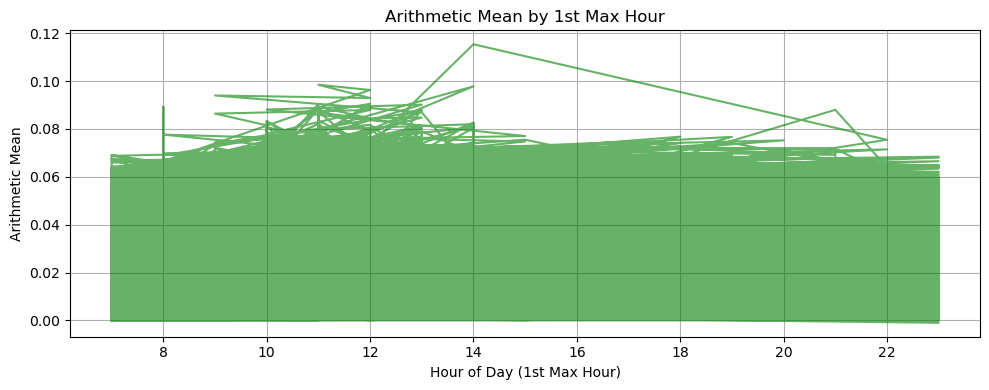

In [10]:
plt.figure(figsize=(10, 4))

# plots "Arithmetic Mean" against "1st Max Hour" with green color and 60% transparency
plt.plot(data['1st Max Hour'], data['Arithmetic Mean'], color='green', alpha=0.6)

# labels plot title and axes
plt.title("Arithmetic Mean by 1st Max Hour")
plt.ylabel("Arithmetic Mean")
plt.xlabel("Hour of Day (1st Max Hour)")

# grid for better readability
plt.grid(True)

# tight_layout prevents overlap between labels
plt.tight_layout()

# displays the plot
plt.show()

### Air Quality Index vs 1st Max Hour (Day)
It makes a line graph showing how the Air Quality Index (AQI) changes depending on the hour of the day when the highest pollution was first recorded.

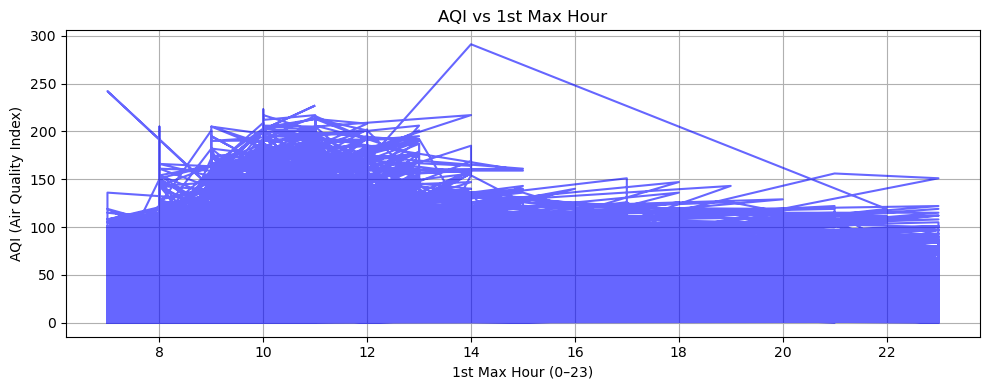

In [12]:
plt.figure(figsize=(10, 4))

# plots "AQI" against "1st Max Hour" with blue color and 60% transparency
plt.plot(data['1st Max Hour'], data['AQI'], color='blue', alpha=0.6)

# labels plot title and axes
plt.title("AQI vs 1st Max Hour")
plt.xlabel("1st Max Hour (0–23)")
plt.ylabel("AQI (Air Quality Index)")

# grid for better readability
plt.grid(True)

# tight_layout prevents overlap between labels
plt.tight_layout()

# displays the plot
plt.show()

## Concluding the Best Hours for Gardeners to be Outside
This code groups the data by the hour of the day when the maximum pollution first happened (from 0 to 23), and then calculates the average AQI and Arithmetic Mean for each of those hours.

In [14]:
# average AQI and Arithmetic Mean by hour
grouped = data.groupby('1st Max Hour')[['AQI', 'Arithmetic Mean']].mean().reset_index()

### For Data Cleaning
This line removes any rows from the grouped table where AQI, Arithmetic Mean, or 1st Max Hour is missing or blank.

In [16]:
# drops rows with missing values within the subset of specified columns 
grouped = grouped.dropna(subset=['AQI', 'Arithmetic Mean', '1st Max Hour'])

### Table
This code identifies which hours of the day are good for gardening based on clean air (AQI) and safe ozone levels (Arithmetic Mean).

In [18]:
# defining the criteria for which hours of the day are considered good for gardening based on AQI and ozone levels
def is_good_hour(row):
    return (row['AQI'] <= 100) and (0.030 <= row['Arithmetic Mean'] <= 0.070)

# applying the criteria to each row
grouped['Good_for_Gardening'] = grouped.apply(is_good_hour, axis=1)

# filtering the rows that meet the criteria
good_hours = grouped[grouped['Good_for_Gardening'] == True]

# displaying the good gardening hours
print(" Good Gardening Hours Based on AQI and Ozone Levels:")
print(good_hours[['1st Max Hour', 'AQI', 'Arithmetic Mean']])

 Good Gardening Hours Based on AQI and Ozone Levels:
    1st Max Hour        AQI  Arithmetic Mean
0              7  34.360072         0.030663
1              8  38.267982         0.032189
2              9  41.120598         0.033141
3             10  44.315523         0.034743
4             11  46.017104         0.036814
5             12  44.269880         0.037559
6             13  42.612845         0.037591
7             14  41.727685         0.037687
8             15  40.233240         0.037129
9             16  38.980159         0.036850
10            17  37.759215         0.035921
11            18  36.932907         0.035338
12            19  36.521688         0.034786
13            20  35.592486         0.033896
14            21  34.509751         0.032686
15            22  33.471867         0.031687


### Bar Chart
This code creates a bar chart showing the average AQI for each hour of the day, with green bars for hours that are good for gardening, and red bars for hours that are not.

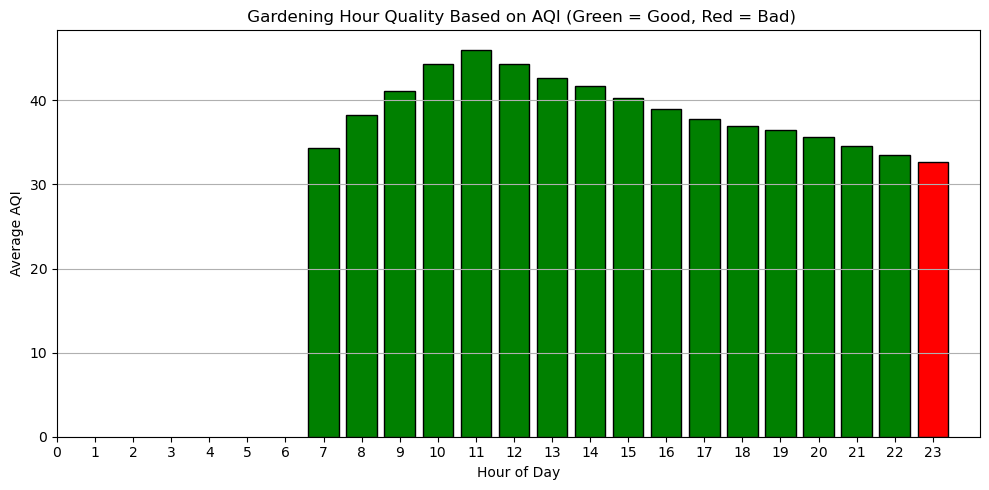

In [20]:
plt.figure(figsize=(10,5))

# assign green for good gardening hours, red for bad gardening hours
colors = ['green' if x else 'red' for x in grouped['Good_for_Gardening']]

# plots "AQI" against "1st Max Hour"
plt.bar(grouped['1st Max Hour'], grouped['AQI'], color=colors, edgecolor='black')

# labels plot title and axes
plt.title(' Gardening Hour Quality Based on AQI (Green = Good, Red = Bad)')
plt.xlabel('Hour of Day')
plt.ylabel('Average AQI')

# adds gridlines on y-axis for better readability
plt.grid(axis='y')

# sets x-axis ticks from 0 to 23 (Python excludes 24)
plt.xticks(range(0, 24))

# tight_layout prevents overlap between labels
plt.tight_layout()

# displays the plot
plt.show()

### Importing Data for Plant Growth Analysis 
This line reads a CSV file named plant_growth_data.csv into Python and stores it as a table (called a DataFrame) named plant_data.

In [22]:
plant_data = pd.read_csv('plant_growth_data.csv', low_memory=False)

### For Data Cleaning 
This line removes any rows from the plant_data table where Sunlight Hours, Temperature, or Growth Milestone is missing or blank, so only complete data is kept.

In [24]:
# drops rows with missing values within the subset of specified columns 
plant_data = plant_data.dropna(subset=['Sunlight_Hours', 'Temperature', 'Growth_Milestone'])

### Plant Growth vs Sunlight
This code creates a line chart that shows how sunlight hours and plant growth milestones change over time (based on the order of measurements).

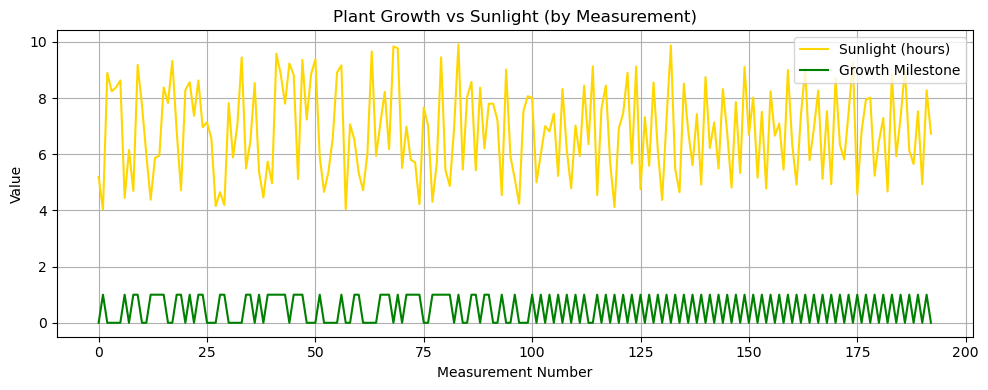

In [26]:
plt.figure(figsize=(10, 4))

# plots sunlight hours against measurement index with gold color
plt.plot(plant_data.index, plant_data['Sunlight_Hours'], label='Sunlight (hours)', color='gold')

# plots growth milestone against measurement index with green color
plt.plot(plant_data.index, plant_data['Growth_Milestone'], label='Growth Milestone', color='green')

# labels plot title and axes
plt.title("Plant Growth vs Sunlight (by Measurement)")
plt.xlabel("Measurement Number") 
plt.ylabel("Value")

# adds a legend to differentiate the two plots
plt.legend()

# grid for better readability
plt.grid(True)

# tight_layout prevents overlap between labels
plt.tight_layout()

# displays the plot
plt.show()

### Plant Growth vs Temperature
This code creates a line chart to show how temperature and plant growth milestones change across different measurements.

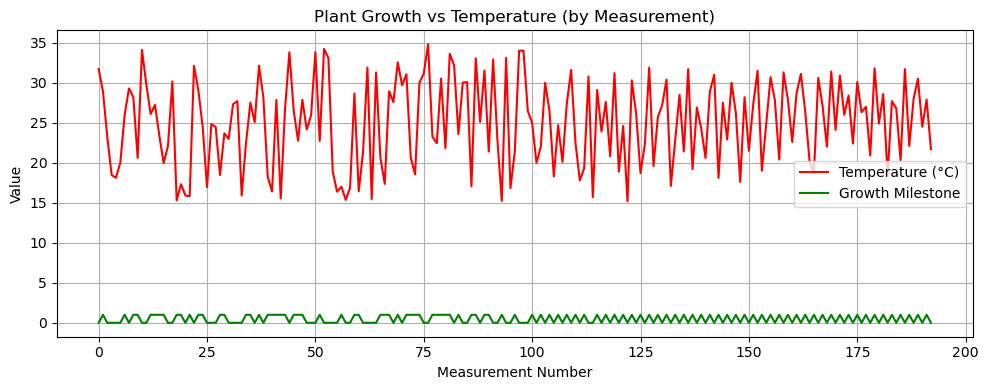

In [28]:
plt.figure(figsize=(10, 4))

# plot temperature against measurement index with red color
plt.plot(plant_data.index, plant_data['Temperature'], label='Temperature (°C)', color='red')

# plot growth milestone against measurement index with green color
plt.plot(plant_data.index, plant_data['Growth_Milestone'], label='Growth Milestone', color='green')

# labels plot title and axes
plt.title("Plant Growth vs Temperature (by Measurement)")
plt.xlabel("Measurement Number")
plt.ylabel("Value")

# adds a legend to differentiate the two plots
plt.legend()

# grid for better readability
plt.grid(True)

# tight_layout prevents overlap between labels
plt.tight_layout()

# displays the plot
plt.show()

### Concluding Best Gardening Hours for Plants 
This code finds and displays the times when sunlight, temperature, and plant growth conditions are ideal for gardening.

In [54]:
# defining the criteria for which rows are considered good for gardening based on sunlight hours, temperature, and growth milestone
def is_good_gardening(row):
    return (
        (5 <= row['Sunlight_Hours'] <= 8) and   
        (15 <= row['Temperature'] <= 30) and   
        (row['Growth_Milestone'] >= 1)           
    )

# applying the criteria to each row
plant_data['Good_Gardening_Time'] = plant_data.apply(is_good_gardening, axis=1)

# filtering the rows that meet the criteria
good_gardening_times = plant_data[plant_data['Good_Gardening_Time'] == True]

# displaying the good gardening hours
print(good_gardening_times[['Sunlight_Hours', 'Temperature', 'Growth_Milestone', 'Good_Gardening_Time']])

     Sunlight_Hours  Temperature  Growth_Milestone  Good_Gardening_Time
13         5.865894    27.234415                 1                 True
14         5.951100    23.392001                 1                 True
18         6.833290    15.287870                 1                 True
24         6.962774    24.483477                 1                 True
34         5.495753    22.492252                 1                 True
35         6.462298    27.517198                 1                 True
39         5.738509    18.258689                 1                 True
43         7.800423    26.715512                 1                 True
46         5.119420    22.763399                 1                 True
51         5.908021    22.722053                 1                 True
59         6.504466    28.660135                 1                 True
60         5.332647    16.423773                 1                 True
65         7.112744    20.637095                 1              

### Which hour of the day is optimal for both gardeners and plants?

In [32]:
# creates a list of all hours in a day
all_hours = list(range(0, 24))

# converts into a set for higher efficiency testing
plant_good_hours = set(good_gardening_times.index)
gardener_good_hours = set(good_hours['1st Max Hour'])

# empty list to store hour labels
hour_labels = []

# determines gardening quality
for hour in all_hours:
    if hour in plant_good_hours and hour in gardener_good_hours:
        label = 'Best for Plants and Gardeners'
    elif hour in plant_good_hours:
        label = 'Good for Plants Only'
    elif hour in gardener_good_hours:
        label = 'Good for Gardeners Only'
    else:
        label = 'Bad for Both'
    hour_labels.append((hour, label))  # appends the hour and label to the hours_label list

# creating a Pandas DataFrame to organize the hour labels into a table
hour_table = pd.DataFrame(hour_labels, columns=['Hour of Day', 'Gardening Quality'])

# displays the table
print(hour_table)

    Hour of Day              Gardening Quality
0             0                   Bad for Both
1             1                   Bad for Both
2             2                   Bad for Both
3             3                   Bad for Both
4             4                   Bad for Both
5             5                   Bad for Both
6             6                   Bad for Both
7             7        Good for Gardeners Only
8             8        Good for Gardeners Only
9             9        Good for Gardeners Only
10           10        Good for Gardeners Only
11           11        Good for Gardeners Only
12           12        Good for Gardeners Only
13           13  Best for Plants and Gardeners
14           14  Best for Plants and Gardeners
15           15        Good for Gardeners Only
16           16        Good for Gardeners Only
17           17        Good for Gardeners Only
18           18  Best for Plants and Gardeners
19           19        Good for Gardeners Only
20           

### Categorizing all the Hours for Specification   

In [57]:
# defines bins for the hours of the day
bins = range(0, 25)

# categorizes hours and stores into variables based on gardening quality
best_hours = list(plant_good_hours & gardener_good_hours)  
bad_hours = [hour for hour in range(24) if hour not in plant_good_hours and hour not in gardener_good_hours]
gardener_only_hours = [hour for hour in gardener_good_hours if hour not in plant_good_hours]
plant_only_hours = [hour for hour in plant_good_hours if hour not in gardener_good_hours]

### Visualization

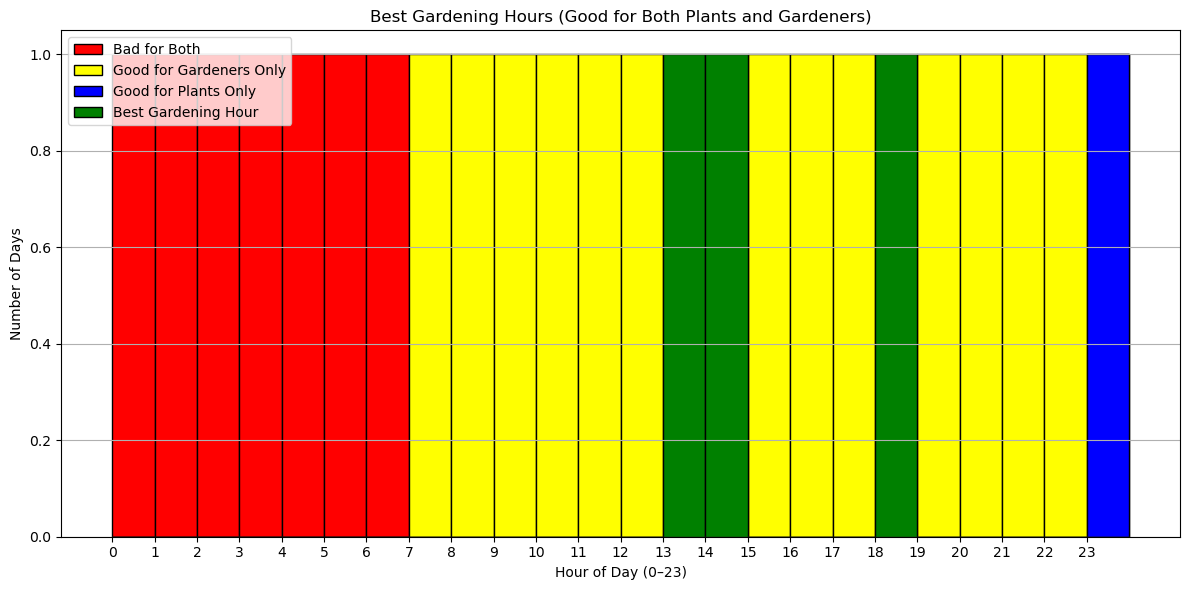

In [36]:
plt.figure(figsize=(12, 6))

# plots the histograms for different gardening quality categories with corresponding colors and labels
plt.hist(bad_hours, bins=bins, color='red', edgecolor='black', label='Bad for Both')
plt.hist(gardener_only_hours, bins=bins, color='yellow', edgecolor='black', label='Good for Gardeners Only')
plt.hist(plant_only_hours, bins=bins, color='blue', edgecolor='black', label='Good for Plants Only')
plt.hist(best_hours, bins=bins, color='green', edgecolor='black', label='Best Gardening Hour')

# labels plot title and axes
plt.title('Best Gardening Hours (Good for Both Plants and Gardeners)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Days')

# adds gridlines on y-axis for better readability
plt.grid(axis='y')

# sets x-axis ticks from 0 to 23
plt.xticks(range(0, 24))

# adds a legend to differentiate the bars
plt.legend()

# tight_layout prevents overlap between labels
plt.tight_layout()

# displays the plot
plt.show()